<a href="https://colab.research.google.com/github/anupsen00/Predicting-Price-Hike-with-Sources-using-Different-Machine-Learning-Algorithms/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/Gold Futures Historical Data.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
def convert_volume(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1000000
        else:
            return float(value.replace(',', ''))
    return value

data['Vol.'] = data['Vol.'].apply(convert_volume)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].astype(str).str.replace(',', '', regex=False)
    data[col] = pd.to_numeric(data[col], errors='coerce')
data['Change %'] = data['Change %'].astype(str).str.strip().str.replace('%', '', regex=False)
data['Change %'] = pd.to_numeric(data['Change %'], errors='coerce')
data['Vol.'].fillna(0, inplace=True)
data.dropna(inplace=True)
data.sort_values(by='Date', inplace=True)

# Feature Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Price', 'Open', 'High', 'Low', 'Vol.']])

# Create sequences for SVR model
window_size = 90
X, y = [], []
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i].flatten())
    y.append(scaled_data[i, 0])
X = np.array(X)
y = np.array(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the SVR model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Reverse the scaling for better interpretability
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 4))), axis=1))[:, 0]
y_pred_actual = scaler.inverse_transform(np.concatenate((y_pred.reshape(-1, 1), np.zeros((len(y_pred), 4))), axis=1))[:, 0]

# Calculate performance metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"SVR Mean Squared Error: {mse}")
print(f"SVR R^2 Score: {r2}")

# Convert regression output to classification for metrics
threshold = 0.01
y_test_binary = (np.diff(y_test_actual) > threshold).astype(int)
y_pred_binary = (np.diff(y_pred_actual) > threshold).astype(int)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"SVR Precision: {precision}")
print(f"SVR Recall: {recall}")
print(f"SVR Accuracy: {accuracy}")
print(f"SVR F1 Score: {f1}")

# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-len(y_test_actual):], y_test_actual, color='blue', label='Actual Price')
plt.plot(data['Date'][-len(y_pred_actual):], y_pred_actual, color='red', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVR - Actual vs Predicted Gold Prices')
plt.legend()
plt.show()


In [ ]:
!pip install joblib

In [ ]:
import joblib
import os

save_dir = '/content/drive/MyDrive/BUBT/ANUP_COMBIED'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


# Save the SVR model
svr_model_path = os.path.join(save_dir, 'SVR_model.pkl')
joblib.dump(model, svr_model_path)
print(f"SVR model saved at {svr_model_path}")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Load and preprocess data (same as SVR code above)

# Create sequences for AdaBoost model
window_size = 60
X, y = [], []
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i].flatten())
    y.append(scaled_data[i, 0])
X = np.array(X)
y = np.array(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the AdaBoost model
base_regressor = DecisionTreeRegressor(max_depth=5)
model = AdaBoostRegressor(estimator=base_regressor, n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Reverse the scaling for better interpretability
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 4))), axis=1))[:, 0]
y_pred_actual = scaler.inverse_transform(np.concatenate((y_pred.reshape(-1, 1), np.zeros((len(y_pred), 4))), axis=1))[:, 0]

# Calculate performance metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"AdaBoost Mean Squared Error: {mse}")
print(f"AdaBoost R^2 Score: {r2}")

# Convert regression output to classification for metrics
threshold = 0.01
y_test_binary = (np.diff(y_test_actual) > threshold).astype(int)
y_pred_binary = (np.diff(y_pred_actual) > threshold).astype(int)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"AdaBoost Precision: {precision}")
print(f"AdaBoost Recall: {recall}")
print(f"AdaBoost Accuracy: {accuracy}")
print(f"AdaBoost F1 Score: {f1}")

# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-len(y_test_actual):], y_test_actual, color='blue', label='Actual Price')
plt.plot(data['Date'][-len(y_pred_actual):], y_pred_actual, color='red', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AdaBoost - Actual vs Predicted Gold Prices')
plt.legend()
plt.show()


In [ ]:
# Save the AdaBoost model
adaboost_model_path = os.path.join(save_dir, 'AdaBoost_model.pkl')
joblib.dump(model, adaboost_model_path)
print(f"AdaBoost model saved at {adaboost_model_path}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 60, 100)             │          22,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 60, 100)             │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143,301 (559.77 KB)

 Trainable params: 143,301 (559.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 49s 334ms/step - loss: 0.0185 - val_loss: 0.0010
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 192ms/step - loss: 0.0019 - val_loss: 7.5790e-04
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step - loss: 0.0018 - val_loss: 7.3161e-04
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 194ms/step - loss: 0.0017 - val_loss: 5.4568e-04
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 256ms/step - loss: 0.0014 - val_loss: 5.6851e-04
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 190ms/step - loss: 0.0013 - val_loss: 5.3658e-04
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - loss: 0.0014 - val_loss: 6.1390e-04
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - loss: 0.0013 - val_loss: 5.6071e-04
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - loss: 0.0011 - val_loss: 4.4442e-04
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - loss: 0.0010 - val_loss: 4.2077e-04
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - loss: 0.0013 - val_loss: 3

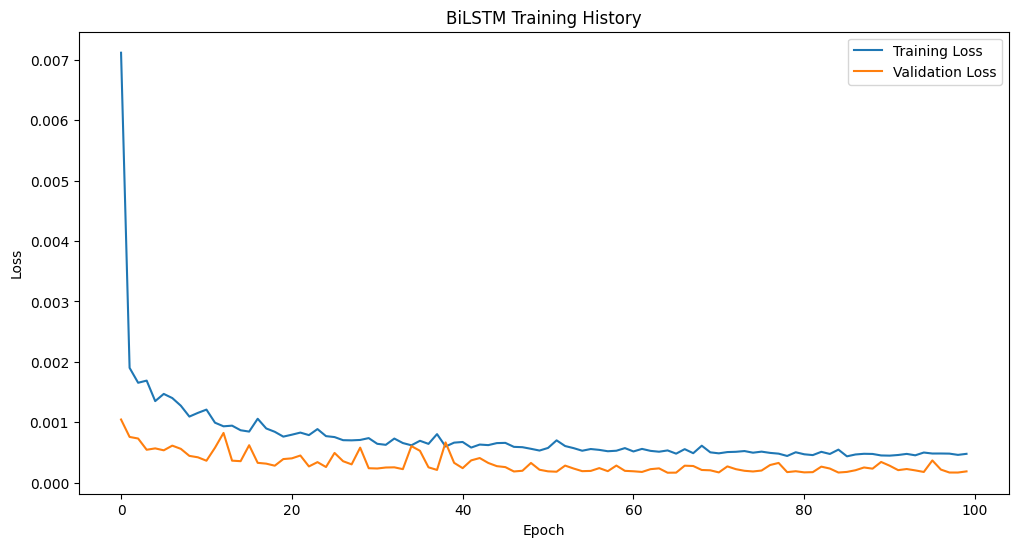

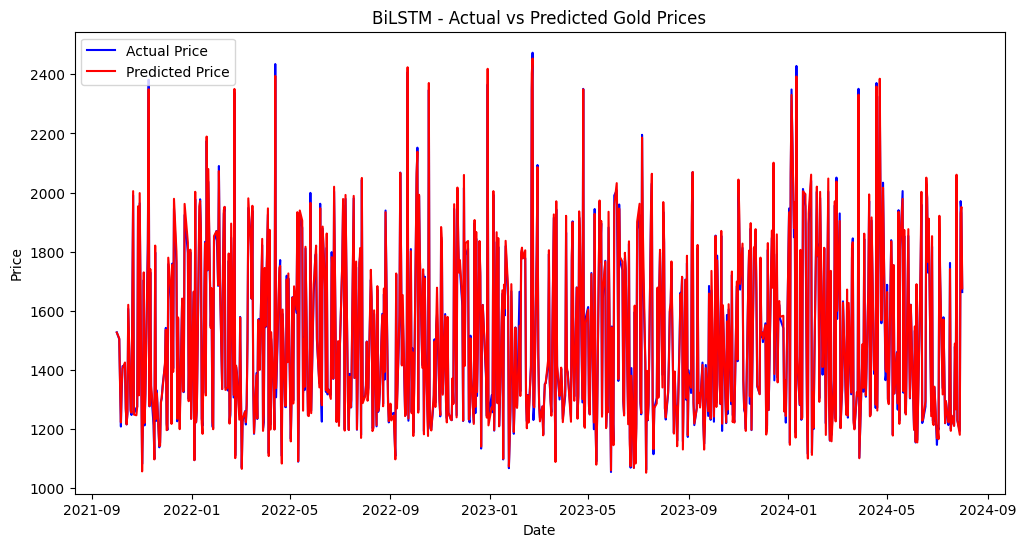

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Load and preprocess data (same as SVR code above)

# Create sequences for BiLSTM model
window_size = 60
X, y = [], []
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i])
    y.append(scaled_data[i, 0])
X = np.array(X)
y = np.array(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)
y_pred = model.predict(X_test)

# Reverse the scaling for better interpretability
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]
y_pred_actual = scaler.inverse_transform(np.concatenate((y_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate performance metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"BiLSTM Mean Squared Error: {mse}")
print(f"BiLSTM R^2 Score: {r2}")

# Convert regression output to classification for metrics
threshold = 0.01
y_test_binary = (np.diff(y_test_actual) > threshold).astype(int)
y_pred_binary = (np.diff(y_pred_actual) > threshold).astype(int)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"BiLSTM Precision: {precision}")
print(f"BiLSTM Recall: {recall}")
print(f"BiLSTM Accuracy: {accuracy}")
print(f"BiLSTM F1 Score: {f1}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('BiLSTM Training History')
plt.legend()
plt.show()

# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-len(y_test_actual):], y_test_actual, color='blue', label='Actual Price')
plt.plot(data['Date'][-len(y_pred_actual):], y_pred_actual, color='red', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BiLSTM - Actual vs Predicted Gold Prices')
plt.legend()
plt.show()


In [ ]:
# Save the BiLSTM model
bilstm_model_path = os.path.join(save_dir, 'BiLSTM_model.h5')
model.save(bilstm_model_path)
print(f"BiLSTM model saved at {bilstm_model_path}")


BiLSTM model saved at /content/drive/MyDrive/BUBT/ANUP_COMBIED/BiLSTM_model.h5


GBRT Mean Squared Error: 310.5477214676616
GBRT R^2 Score: 0.9965528071925825
GBRT Precision: 0.9700272479564033
GBRT Recall: 0.978021978021978
GBRT Accuracy: 0.9740082079343365
GBRT F1 Score: 0.9740082079343365


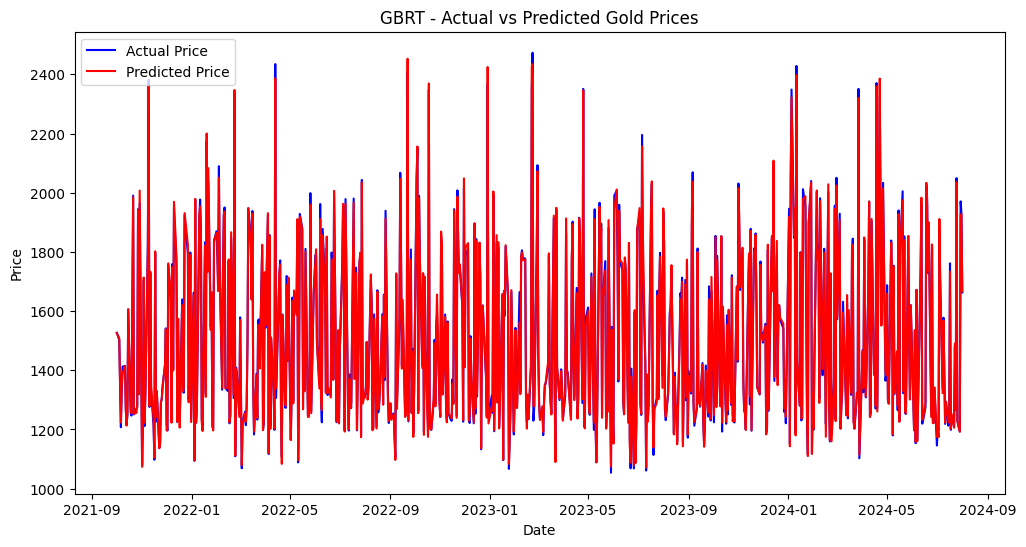

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Load and preprocess data (same as SVR code above)

# Create sequences for GBRT model
window_size = 60
X, y = [], []
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i].flatten())
    y.append(scaled_data[i, 0])
X = np.array(X)
y = np.array(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the GBRT model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Reverse the scaling for better interpretability
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 4))), axis=1))[:, 0]
y_pred_actual = scaler.inverse_transform(np.concatenate((y_pred.reshape(-1, 1), np.zeros((len(y_pred), 4))), axis=1))[:, 0]

# Calculate performance metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"GBRT Mean Squared Error: {mse}")
print(f"GBRT R^2 Score: {r2}")

# Convert regression output to classification for metrics
threshold = 0.01
y_test_binary = (np.diff(y_test_actual) > threshold).astype(int)
y_pred_binary = (np.diff(y_pred_actual) > threshold).astype(int)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"GBRT Precision: {precision}")
print(f"GBRT Recall: {recall}")
print(f"GBRT Accuracy: {accuracy}")
print(f"GBRT F1 Score: {f1}")

# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-len(y_test_actual):], y_test_actual, color='blue', label='Actual Price')
plt.plot(data['Date'][-len(y_pred_actual):], y_pred_actual, color='red', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GBRT - Actual vs Predicted Gold Prices')
plt.legend()
plt.show()


In [ ]:
import joblib

# Save the GBRT model
gbrt_model_path = os.path.join(save_dir, 'GBRT_model.pkl')
joblib.dump(model, gbrt_model_path)
print(f"GBRT model saved at {gbrt_model_path}")


GBRT model saved at /content/drive/MyDrive/BUBT/ANUP_COMBIED/GBRT_model.pkl


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 60, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,651 (201.76 KB)

 Trainable params: 51,651 (201.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 110ms/step - loss: 0.0273 - val_loss: 9.2691e-04
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 0.0030 - val_loss: 7.8672e-04
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 0.0025 - val_loss: 7.5936e-04
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - loss: 0.0021 - val_loss: 7.0550e-04
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - loss: 0.0022 - val_loss: 6.9337e-04
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.0016 - val_loss: 6.8640e-04
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 0.0017 - val_loss: 7.5109e-04
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - loss: 0.0018 - val_loss: 5.4684e-04
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 0.0013 - val_loss: 7.3663e-04
Ep

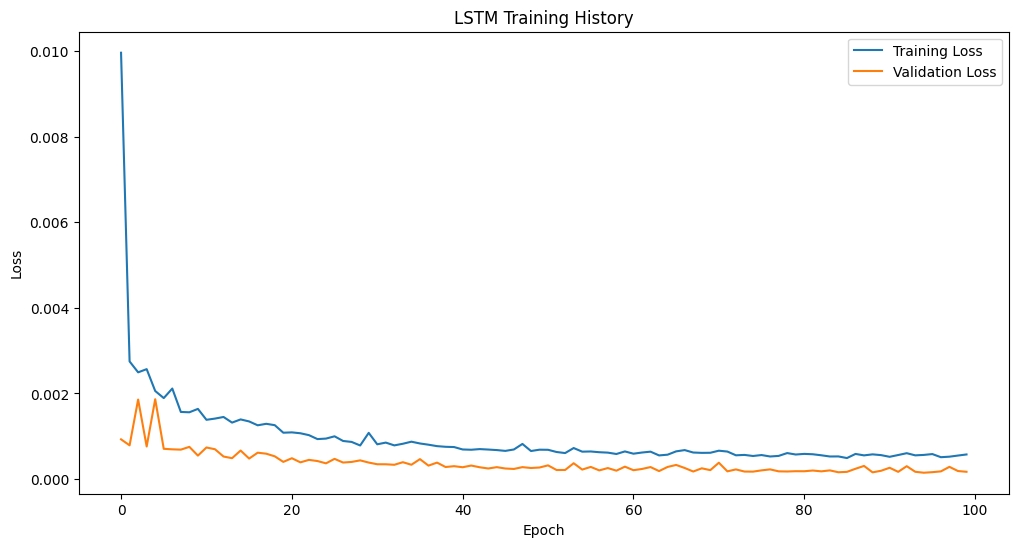

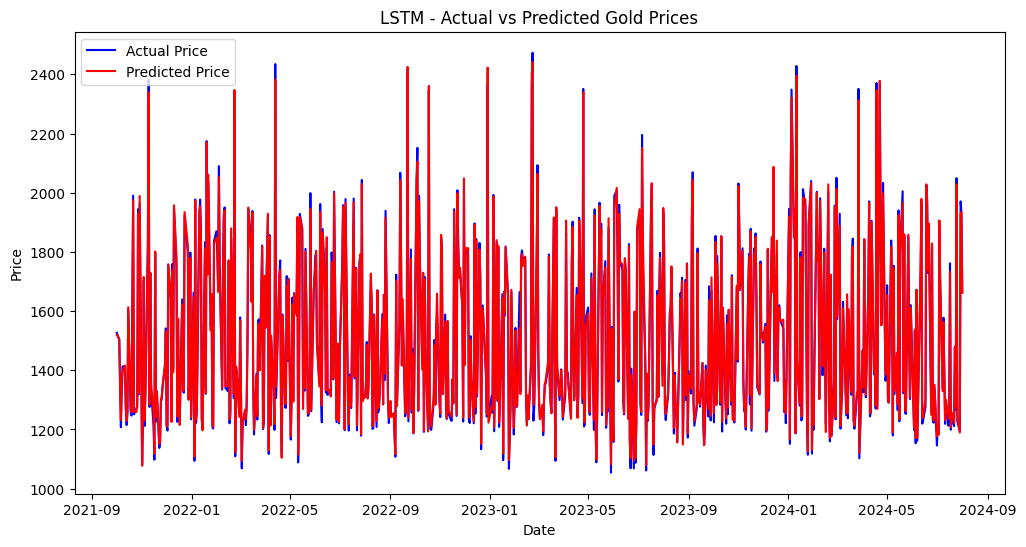

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Load and preprocess data (same as SVR code above)

# Create sequences for LSTM model
window_size = 60
X, y = [], []
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i])
    y.append(scaled_data[i, 0])
X = np.array(X)
y = np.array(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)
y_pred = model.predict(X_test)

# Reverse the scaling for better interpretability
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]
y_pred_actual = scaler.inverse_transform(np.concatenate((y_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate performance metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"LSTM Mean Squared Error: {mse}")
print(f"LSTM R^2 Score: {r2}")

# Convert regression output to classification for metrics
threshold = 0.01
y_test_binary = (np.diff(y_test_actual) > threshold).astype(int)
y_pred_binary = (np.diff(y_pred_actual) > threshold).astype(int)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"LSTM Precision: {precision}")
print(f"LSTM Recall: {recall}")
print(f"LSTM Accuracy: {accuracy}")
print(f"LSTM F1 Score: {f1}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training History')
plt.legend()
plt.show()

# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-len(y_test_actual):], y_test_actual, color='blue', label='Actual Price')
plt.plot(data['Date'][-len(y_pred_actual):], y_pred_actual, color='red', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LSTM - Actual vs Predicted Gold Prices')
plt.legend()
plt.show()


In [ ]:
# Save the LSTM model
lstm_model_path = os.path.join(save_dir, 'LSTM_model.h5')
model.save(lstm_model_path)
print(f"LSTM model saved at {lstm_model_path}")


LSTM model saved at /content/drive/MyDrive/BUBT/ANUP_COMBIED/LSTM_model.h5


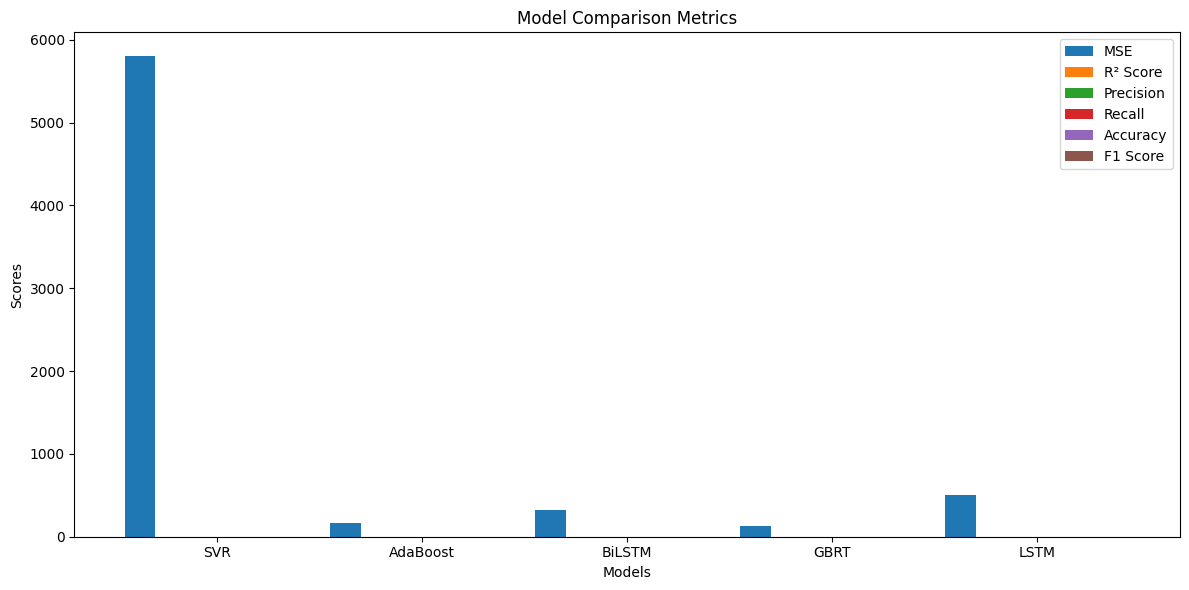

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
models = ['SVR', 'AdaBoost', 'BiLSTM', 'GBRT', 'LSTM']
metrics = {
    'MSE': [5800.10, 165.40, 319.85, 132.96, 505.93],
    'R² Score': [0.9732, 0.9992, 0.9985, 0.9994, 0.9976],
    'Precision': [0.9546, 0.9959, 0.9938, 0.9939, 0.9959],
    'Recall': [0.9507, 0.9837, 0.9776, 0.9898, 0.9837],
    'Accuracy': [0.9531, 0.9899, 0.9858, 0.9919, 0.9899],
    'F1 Score': [0.9527, 0.9897, 0.9856, 0.9918, 0.9897]
}

# Plot setup
x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each metric
for i, (metric, values) in enumerate(metrics.items()):
    ax.bar(x + i * width, values, width, label=metric)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison Metrics')
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


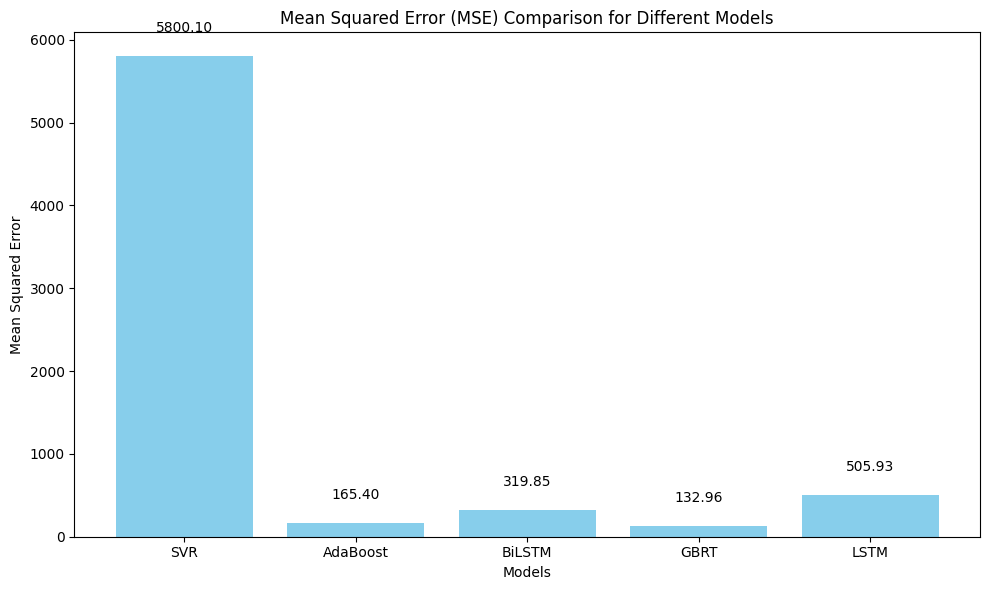

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
models = ['SVR', 'AdaBoost', 'BiLSTM', 'GBRT', 'LSTM']
mse_values = [5800.10, 165.40, 319.85, 132.96, 505.93]

# Plot setup for MSE
plt.figure(figsize=(10, 6))

# Create bar plot for MSE
plt.bar(models, mse_values, color='skyblue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error (MSE) Comparison for Different Models')

# Display the value on each bar
for i, value in enumerate(mse_values):
    plt.text(i, value + 0.05 * max(mse_values), f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.4 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Paths to saved models
model_paths = {
    'LSTM': '/content/drive/MyDrive/BUBT/ANUP_COMBIED/LSTM_model.h5',
    'BiLSTM': '/content/drive/MyDrive/BUBT/ANUP_COMBIED/BiLSTM_model.h5',
    'SVR': '/content/drive/MyDrive/BUBT/ANUP_COMBIED/SVR_model.pkl',
    'AdaBoost': '/content/drive/MyDrive/BUBT/ANUP_COMBIED/AdaBoost_model.pkl',
    'GBRT': '/content/drive/MyDrive/BUBT/ANUP_COMBIED/GBRT_model.pkl'
}

# Load and preprocess the dataset
file_path = '/content/Gold Futures Historical Data.csv'
data = pd.read_csv(file_path)

# Data Preprocessing Function
def preprocess_data(data):
    def convert_volume(value):
        if isinstance(value, str):
            if 'K' in value:
                return float(value.replace('K', '')) * 1000
            elif 'M' in value:
                return float(value.replace('M', '')) * 1000000
            else:
                return float(value.replace(',', ''))
        return value

    data['Vol.'] = data['Vol.'].apply(convert_volume)
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    for col in ['Price', 'Open', 'High', 'Low']:
        data[col] = data[col].astype(str).str.replace(',', '', regex=False)
        data[col] = pd.to_numeric(data[col], errors='coerce')

    data['Change %'] = data['Change %'].astype(str).str.strip().str.replace('%', '', regex=False)
    data['Change %'] = pd.to_numeric(data['Change %'], errors='coerce')

    for col in data.columns:
        if data[col].isnull().sum() > 0:
           if col == 'Vol.':  # Fill 'Vol.' with median
              data[col].fillna(data[col].median(), inplace=True)
           elif col in ['Price', 'Open', 'High', 'Low']:  # Numeric columns with iterative imputation
                 imputer = IterativeImputer()
                 data[[col]] = imputer.fit_transform(data[[col]])
           elif col == 'Change %':  # Choose an appropriate fill strategy for 'Change %'
                 data[col].fillna(data[col].mean(), inplace=True)  # Here using mean as an example
           else:
                data.dropna(subset=[col], inplace=True)  # Drop rows with missing data in non-essential columns

# Drop rows with any remaining missing values (e.g., in 'Date' or other non-numeric columns)
    data.dropna(inplace=True)

    return data

# Preprocess the data
data = preprocess_data(data)

# Initialize the scaler and scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Price', 'Open', 'High', 'Low', 'Vol.']])

# Streamlit App Interface
st.title("Gold Price Prediction App")

# Create three tabs: Price Prediction, Future Prediction, Model Comparison
tab1, tab2, tab3 = st.tabs(["Price Prediction", "Future Prediction", "Model Comparison"])

# Model selection for both Price Prediction and Future Prediction
selected_models = st.multiselect(
    "Select the models to use for prediction:",
    options=model_paths.keys(),
    default=['LSTM']
)

# Tab 1: Price Prediction
with tab1:
    st.subheader("Price Prediction Based on Selected Features")

    # Feature selection
    selected_features = st.multiselect(
        "Selected features to use for prediction:",
        options=['Open', 'High', 'Low', 'Vol.'],
        default=['Open', 'High', 'Low', 'Vol.']
    )

    # Ensure 'Price' is always part of the dataset for predictions, even if not selected
    all_features = ['Price'] + selected_features

    # Select a date range
    start_date = st.date_input("Start Date", value=pd.to_datetime(data['Date'].min()))
    end_date = st.date_input("End Date", value=pd.to_datetime(data['Date'].max()))

    # Filter data based on the selected date range
    filtered_data = data[(data['Date'] >= pd.to_datetime(start_date)) & (data['Date'] <= pd.to_datetime(end_date))]

    # Predict based on selected features for each model
    if not filtered_data.empty:
        # Scale data only for selected features
        X_test = scaler.transform(filtered_data[all_features])

        # Create sequences for model input
        window_size = 60
        sequences = []
        for i in range(window_size, len(X_test)):
            sequences.append(X_test[i-window_size:i])

        if sequences:
            sequences = np.array(sequences)
            plt.figure(figsize=(10, 6))

            # Plot actual price
            plt.plot(filtered_data['Date'][window_size:], filtered_data['Price'][window_size:], label="Actual Price", color='yellow')

            for model_name in selected_models:
                if model_name in ['LSTM', 'BiLSTM']:
                    model = load_model(model_paths[model_name])
                    y_pred = model.predict(sequences)
                else:
                    # Flatten the sequences for non-LSTM models
                    non_lstm_X_test = [X_test[i-window_size:i].flatten() for i in range(window_size, len(X_test))]
                    non_lstm_X_test = np.array(non_lstm_X_test)

                    model = joblib.load(model_paths[model_name])
                    y_pred = model.predict(non_lstm_X_test)

                # Reverse scaling for predicted values, using only the 'Price' feature for inverse transform
                y_pred_actual = scaler.inverse_transform(
                    np.concatenate((y_pred.reshape(-1, 1), np.zeros((y_pred.shape[0], X_test.shape[1] - 1))), axis=1)
                )[:, 0]

                # Plot predicted price
                plt.plot(filtered_data['Date'][window_size:], y_pred_actual, label=f"{model_name} Predicted Price")

            # Plot results
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.title('Predicted vs Actual Price')
            plt.legend()
            st.pyplot(plt)
        else:
            st.warning("Not enough data for prediction in the selected date range.")
    else:
        st.warning("No data available for the selected date range.")

# Tab 2: Future Price Prediction
with tab2:
    st.subheader("Future Price Prediction")

    # Select a window size and number of future days
    window_size = st.slider("Select Window Size (Days):", 30, 120, 60)
    n_future_days = st.slider("Select Number of Future Days:", 1, 120, 30)

    # Predict future prices for each selected model
    future_predictions_by_model = {}
    future_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_future_days, freq='D')

    for model_name in selected_models:
        # Create the input sequence from the latest available data
        last_sequence = scaled_data[-window_size:, :]

        future_predictions = []
        for _ in range(n_future_days):
            last_sequence_reshaped = np.expand_dims(last_sequence, axis=0)

            if model_name in ['LSTM', 'BiLSTM']:
                model = load_model(model_paths[model_name])
                future_price = model.predict(last_sequence_reshaped)
            else:
                model = joblib.load(model_paths[model_name])
                future_price = model.predict(last_sequence_reshaped[:, :, :-1].reshape(-1, window_size * (scaled_data.shape[1] - 1)))

            future_predictions.append(future_price[0, 0])

            # Update sequence with predicted price and preserve other feature values
            last_sequence = np.append(
                last_sequence[1:],
                [[future_price[0, 0], last_sequence[-1, 1], last_sequence[-1, 2], last_sequence[-1, 3], last_sequence[-1, 4]]],
                axis=0
            )

        # Reverse scaling for future predictions
        future_predictions_scaled = scaler.inverse_transform(
            np.concatenate((np.array(future_predictions).reshape(-1, 1), np.tile(scaled_data[-1, 1:], (n_future_days, 1))), axis=1)
        )[:, 0]

        future_predictions_by_model[model_name] = future_predictions_scaled

    # Plot future predictions
    plt.figure(figsize=(10, 6))
    for model_name, future_predictions in future_predictions_by_model.items():
        plt.plot(future_dates, future_predictions, label=f"{model_name} Future Predicted Price")

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Future Gold Price Predictions')
    plt.legend()
    st.pyplot(plt)

# Tab 3: Model Comparison
with tab3:
    st.subheader("Model Comparison")

    # Metrics data
    models = ['SVR', 'AdaBoost', 'BiLSTM', 'GBRT', 'LSTM']
    metrics = {
        'MSE': [5800.10, 165.40, 319.85, 132.96, 505.93],
        'R² Score': [0.9732, 0.9992, 0.9985, 0.9994, 0.9976],
        'Precision': [0.9546, 0.9959, 0.9938, 0.9939, 0.9959],
        'Recall': [0.9507, 0.9837, 0.9776, 0.9898, 0.9837],
        'Accuracy': [0.9531, 0.9899, 0.9858, 0.9919, 0.9899],
        'F1 Score': [0.9527, 0.9897, 0.9856, 0.9918, 0.9897]
    }

    # Metric selection
    selected_metric = st.selectbox("Select the metric to display:", options=list(metrics.keys()))

    # Plot the selected metric
    plt.figure(figsize=(12, 6))
    x = np.arange(len(models))  # the label locations
    width = 0.15  # the width of the bars

    # Plot each metric
    values = metrics[selected_metric]
    plt.bar(x, values, width, color='skyblue')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.xlabel('Models')
    plt.ylabel(selected_metric)
    plt.title(f'Model Comparison - {selected_metric}')
    plt.xticks(x, models)

    # Display the value on each bar
    for i, value in enumerate(values):
        plt.text(i, value + 0.05 * max(values), f'{value:.2f}', ha='center')

    plt.tight_layout()
    st.pyplot(plt)


Writing app.py


In [ ]:
!pip install streamlit pyngrok

In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.19.121.47


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.19.121.47:8501



In [1]:
!git --version

git version 2.34.1
